# Assignment 9.1 - Backpropagation

Please submit your solution of this notebook in the Whiteboard at the corresponding Assignment entry as .ipynb-file and as .pdf. <br><br>
Please do **NOT** rename the file!

#### State both names of your group members here:
[Jane and John Doe]

## Task 9.1.1: Backpropagation

* Implement a two-layer artificial neural network using `numpy` and/or `torch`with two input neurons and `two` output neurons. Choose the number of hidden neurons to your liking. **(RESULT)**
* Implement a train function that runs the backpropagation algorithm. Don't use `PyTorch`'s autograd functionality. **(RESULT)**
* Our goal is to learn the XOR function. What does the network return for random weights of all combinations of (binary) inputs? **(RESULT)**

Further reading: Rojas book (https://www.inf.fu-berlin.de/inst/ag-ki/rojas_home/documents/1996/NeuralNetworks/neuron.pdf), chapter 7.3.3 and learn about the "matrix way" of implementing backprop.

In [1]:
# Imports
import numpy as np
import torch

# Helper functions
def normalize(data, mean=None, variance=None, ret=False):
    """Normalizes the data to allow for faster convergence of the gradient ascent"""
    if mean is None:
        mean = np.mean(data, axis=0)[np.newaxis,:]
    if variance is None:
        std = np.std(data, axis=0)[np.newaxis,:]
    std[np.where(std == 0)] = 1
    data_ = (data - mean) / std
    if ret:
        return data_
    else:
        return data_, mean, std

def onehot(labels, k):
    n = len(labels)
    onehot_labels = np.zeros([n, k])
    onehot_labels[range(n), labels] = 1
    return onehot_labels

In [2]:
class NN:   # Feel free to adjust the class structure / functions.
    def __init__(self):
        pass
        # TODO: Implement

    def train(self):
        pass
        # TODO: Implement

    def feedforward(self):
        """Feed-forward given input and weight matrices W1 and W2."""
        pass
        # TODO: Implement

    def backprop(self):
        pass
        # TODO: Implement

    def optimize(self):
        """Update step"""
        pass
        # TODO: Implement

In [3]:
# XOR dataset
xor_data = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1],
])
xor_labels = onehot(np.array([0, 1, 1, 0]), 2)
print(xor_labels.shape)
print(xor_labels)

(4, 2)
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


## Task 9.1.2: Backpropagation

Implement Backpropagation and optimize the weights of your neural network using the XOR dataset: 

| x | y |
| -------- | ------- |
| (0,0) | 0 |
| (0,1) | 1 |
| (1,0) | 1 |
| (1,1) | 0 |

* How many training iterations do you need? Plot the network error over the number of iterations **(RESULT)**

In [4]:
import matplotlib.pyplot as plt

## Task 9.1.3: MNIST (BONUS)

* Train your network on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and state the model accuracy (or the model error) for the training and test sets. **(RESULT)** 
* Compare to this [list](https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#4d4e495354) and report on the performance of your model. **(RESULT)**

In [5]:
# You can access MNIST using torchvision (https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html)
import torchvision.datasets as datasets

mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=None)

mnist_train_data = mnist_train.data.numpy()
mnist_train_labels = mnist_train.targets.numpy()
mnist_test_data = mnist_test.data.numpy()
mnist_test_labels = mnist_test.targets.numpy()

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:03<00:00, 2723233.98it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 269075.03it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:00<00:00, 2221914.60it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 9198710.17it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



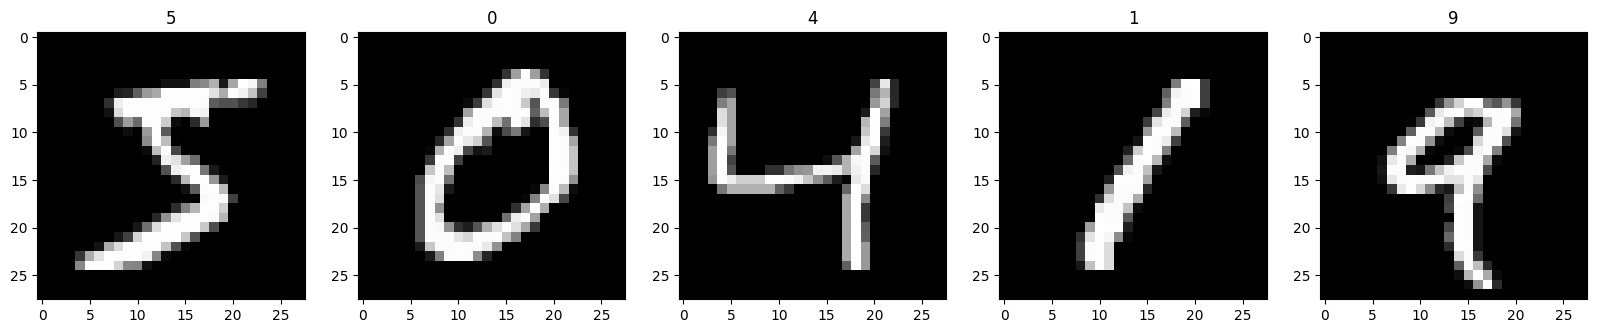

In [6]:
images, labels = mnist_train_data[:5], mnist_train_labels[:5]

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    axes[i].set_title(labels[i])
    axes[i].imshow(images[i], cmap='gray')

In [7]:
mnist_train_data_, mean, mu = normalize(mnist_train_data.reshape([-1, 28*28]))
mnist_train_labels_ = onehot(mnist_train_labels, 10)

In [9]:
# TODO: Implement
print(mnist_train_data_.shape)

(60000, 784)


In [10]:
print(mnist_train_data.shape)

(60000, 28, 28)


Ok-ish performance (error-rate 7%+), still a large gap to state-of-the-art models (error-rate 0.21%).

## Congratz, you made it! :)